In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [268]:
map = (9, 9)
nuc = np.array([[5, 5]])
all_mol = []

In [311]:
class Molecule:
    def __init__(self):
        self.pos = [self.spawn()]
        
    def spawn(self):
        global all_mol
        while True:
            pos = np.array([np.random.randint(0, map[0] + 1), np.random.randint(0, map[1] + 1)])
            if any([any([i.all() for i in pos == mol.pos]) for mol in all_mol]):
                continue
            return pos
        
    def nextto(self):
        global all_mo
        neighb = [[[abs((j - i)[0]) + abs((j - i)[1]) == 1 for i in mol.pos] for mol in all_mol] for j in self.pos]
        return neighb
        #[[ for i in j] for j in neighb]
        
    def move(self):
        dir = np.array([np.random.choice([-1, 1]), np.random.choice([-1, 1])])
        self.pos += dir

In [312]:
all_mol = []

for i in range(30):
    new_mol = Molecule()
    all_mol.append(new_mol)

In [317]:
all_mol[9].nextto()

[[[True],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [True],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [False],
  [True]]]

In [314]:
all_pos = []

for mol in all_mol:
    all_pos.append(mol.pos)

In [315]:
all_pos

[[array([7, 2])],
 [array([5, 1])],
 [array([3, 5])],
 [array([3, 2])],
 [array([6, 4])],
 [array([5, 8])],
 [array([3, 7])],
 [array([6, 8])],
 [array([3, 0])],
 [array([7, 1])],
 [array([0, 2])],
 [array([0, 9])],
 [array([6, 0])],
 [array([1, 1])],
 [array([9, 5])],
 [array([6, 6])],
 [array([8, 9])],
 [array([8, 2])],
 [array([9, 6])],
 [array([9, 3])],
 [array([7, 0])],
 [array([4, 3])],
 [array([0, 0])],
 [array([8, 0])],
 [array([2, 7])],
 [array([8, 5])],
 [array([2, 9])],
 [array([7, 4])],
 [array([9, 1])],
 [array([6, 1])]]

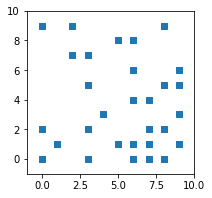

In [316]:
plt.figure(figsize=(3, 3))
plt.scatter(*np.array(all_pos).T, marker = 's')
plt.axis([-1, map[0]+1, -1, map[0]+1])
plt.show()